Getting all the libraries 

In [602]:
from tensorflow import keras
import pandas as pd
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


Getting the table, dropping all NaN values

In [603]:
df = pd.read_csv("winequality-red.csv")
df = df.dropna()

Removing the skewiness of the data

In [604]:
df['chlorides'] = np.log(df['chlorides'])
df['chlorides'] += 5
df['chlorides'] = np.log(df['chlorides'])
df['residual sugar'] = np.log(df['residual sugar'])
df['sulphates'] = np.log(df['sulphates'])
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'])
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide'])



Splitting the training and validation datasets

In [605]:
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)


X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis = 1)


y_train = df_train['quality']
y_valid = df_valid['quality']

Model architecture 

In [606]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = [11]),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)
])


Compiling the model with an optimizer and a loss function

In [607]:

model.compile(optimizer='adam', loss='mae')

Fitting the model and defining the early stop

In [608]:
early_stopping = EarlyStopping(min_delta=0.01, patience=50, restore_best_weights=True)


history =  model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 300,
    epochs = 500,
    callbacks =[early_stopping]
)

Epoch 1/500
4/4 [==============================] - 0s 36ms/step - loss: 5.5354 - val_loss: 4.9777
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 4.5474 - val_loss: 3.8268
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 3.2572 - val_loss: 2.2153
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 1.4578 - val_loss: 0.6702
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 1.0247 - val_loss: 1.2384
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 0.9987 - val_loss: 0.6282
Epoch 7/500
4/4 [==============================] - 0s 8ms/step - loss: 0.7080 - val_loss: 0.9247
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 0.8373 - val_loss: 0.6848
Epoch 9/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6308 - val_loss: 0.6615
Epoch 10/500
4/4 [==============================] - 0s 8ms/step - loss: 0.6977 - val_loss: 0.6627
Epoch 11/500
4/4 [==========

Getting the history of the model, and plotting the loss and validation loss

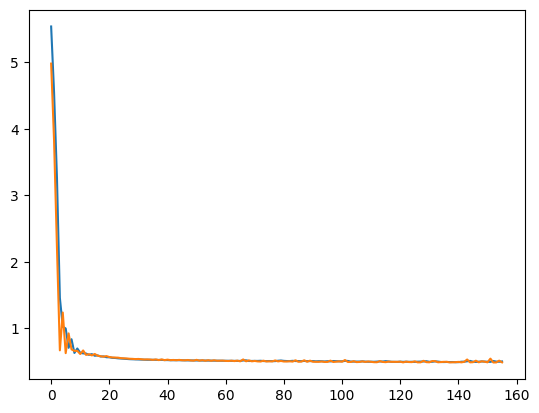

In [609]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()
history_df['val_loss'].plot()
plt.show()


Saving the model

In [610]:
model.save("winequalityred.model")

INFO:tensorflow:Assets written to: winequalityred.model/assets


INFO:tensorflow:Assets written to: winequalityred.model/assets
